# Introduce

我們這次要介紹決策樹，決策樹其實對人類來說是最直覺最直觀的方法，我們來考慮一個情境題，
假設媽媽要你幫她去買文具，你開始思考如果外面天氣不好下雨或是太陽太大就在家休息，
然後你看到天氣不錯的那一天，你覺得自己一個人去買文具太無聊要拉個朋友，如果小美、小萌、小慧誰有空陪你去你就願意出門，
然後開始打電話，你約到小萌有空陪你去，到了賣場挑完原子筆、膠水、筆記本、釘書機等文具，你發現香水、指甲油等等你都想要買，
你發現蛙阿錢包裡的錢不夠，你跟小萌說我帶的錢不夠可以借我一點錢嗎?
小萌說不行這些她的錢要拿來裝可愛買娃娃的，你只好回家找媽媽要錢，媽媽就問你說你到底是怎麼做事的，
交辦這麼多天東西還沒買好，去做一份流程圖再來拿錢，你就把你的策略寫下來。




於是你畫下你的決策樹。

<details>
<summary> 手繪決策樹 </summary>
![tree](../../../images/consume.drawio.png)

</details>


決策樹的想法是不是很直接與直觀，下面我們來看 Iris 資料集的決策樹的圖。


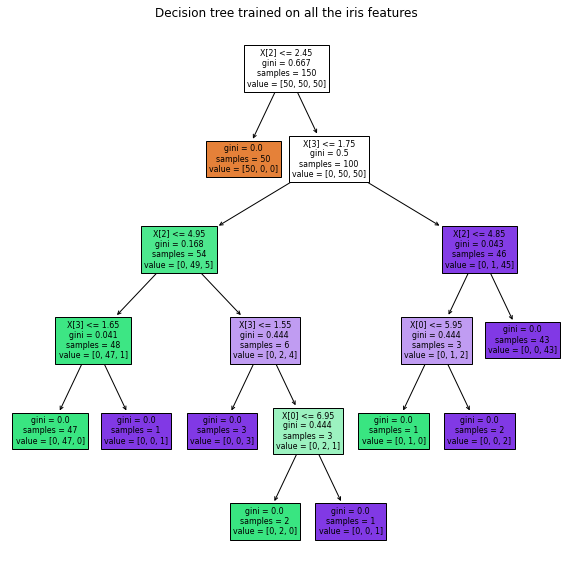

In [3]:
from sklearn.tree import plot_tree
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 10]

iris = load_iris()

classifier = DecisionTreeClassifier().fit(iris.data, iris.target)

plt.figure()
plot_tree(classifier, filled=True)
plt.title("Decision tree trained on all the iris features")
plt.show()


下面來簡單驗證看看。

In [26]:

# 驗證看看
iris.target[iris.data[:,2] < 2.45]


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

如果換個參數，用 entropy。

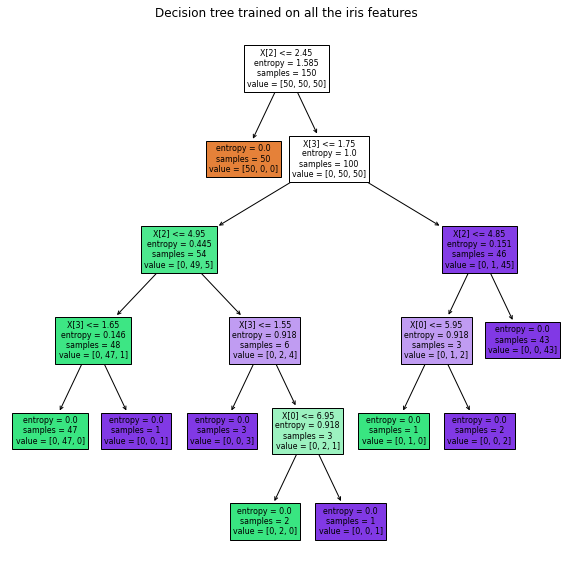

In [14]:
from sklearn.tree import plot_tree
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 10]

iris = load_iris()

classifier = DecisionTreeClassifier(criterion='entropy').fit(iris.data, iris.target)

plt.figure()
plot_tree(classifier, filled=True)
plt.title("Decision tree trained on all the iris features")
plt.show()


In [27]:
from scipy.stats import entropy

entropy([1], base=2)
#entropy([1/2, 1/2], base=2)
#entropy([1/3, 1/3, 1/3], base=2)

0.0

In [28]:
# ??DecisionTreeClassifier

決策樹在機器學習的方法裡面算是最直觀的方法，看完上面的例子，我猜大家會有的問題是那我要如何決定分支，所以下面要介紹 information theory。




# Information theory

我們下面來說一下 1948 年 ， Claude Shannon 提出的 information theory 是怎麼理解的，下面我們看一張圖。

![gini](../../../images/gini_entropy.drawio.png)

請問你覺得哪個最亂?  哪個資訊比較多?



如果給定隨機變數 $X$ ， $P$ 為 $X$ 的機率密度函數 Probability Density Function ，
下面要介紹怎麼衡量一組資訊的混亂程度，常見的有三種 Entropy、Gini impurity、Classification Error。

<details>
<summary> Entropy、Gini、C.E. 範例 </summary>

## Entropy 熵

$$
I_H(X) := - \sum_{i=1}^n P(x_i) \log_2 P(x_i) 
$$

- 圖(A)的 Entropy 是 0
- 圖(B)的 Entropy 是 1
$$
-(\frac{\log_2 (1/2)}{2} + \frac{\log_2 (1/2)}{2}) = -\log_2 (1/2) = 1
$$
- 圖(C)的 Entropy 是 1.585
$$
-(\frac{\log_2 (1/3)}{3} * 3) = -\log_2 (1/3) \sim 1.585
$$

## Gini impurity 不純度

$$
I_G(X) := 1 - \sum_{i=1}^n P(x_i)^2
$$

- 圖(A)的 Gini impurity 是 0
- 圖(B)的 Gini impurity 是 $\frac{1}{2}$
$$
1 - (\frac{1}{2^2} + \frac{1}{2^2}) = 1 - \frac{1}{2} = \frac{1}{2}
$$
- 圖(C)的 Gini impurity 是 $\frac{2}{3}$
$$
1 - \frac{1}{3^2} * 3 = 1 - \frac{1}{3} = \frac{2}{3}
$$

## Classification Error

$$
I_E(X) := 1 - \max \{ P(x_i) \}
$$

- 圖(A)的 Classification Error 是 0
- 圖(B)的 Classification Error 是 $\frac{1}{2}$
- 圖(C)的 Classification Error 是 $\frac{2}{3}$

</details>



<details>
<summary> 衡量財富不均的吉尼係數 Gini coefficient </summary>

是 20 世紀初，義大利統計學家 Corrado Gini 提出的

![gini factor](../../../images/Gini%20factor03.jpg)

$$
\frac{A}{A+B} = 1 - \frac{B}{A+B}
$$

Gini coefficient 是介於 0 到 1 之間的值，0 表示大家的收入完全一樣
- 若低於 $0.2$ 表示 財富很平均
- $0.2 \sim 0.29$ 表示 **財富不均** 低；
- $0.3 \sim 0.39$ 表示 **財富不均** 中等；
- $0.4 \sim 0.59$ 表示 **財富不均** 高；
- $0.6$ 以上表示 **財富不均** 極高。

我們回到我們的例子，假設藍色是收入100，紅色是收入0，綠色是收入50。

- 圖(A)的 吉尼係數是 0
- 圖(B)的 吉尼係數是 1/2
- 圖(C)的 吉尼係數是 1/3

我們可以知道跟 information theory 提到的有一些差別，
很明顯的一點根據定義給不同顏色不同收入，吉尼係數是不一樣的，
但是對於 information theory 來說是一樣的。

</details>



下面要談談 **信息增益**

## 信息增益 Information Gain (IG)

$$
IG(X) := I(X) - \frac{N_{left}}{N} I(X_{left}) - \frac{N_{right}}{N} I(X_{right})
$$



In [1]:
%reload_ext mermaid

In [ ]:

example IG:
https://www.bogotobogo.com/python/scikit-learn/scikt_machine_learning_Decision_Tree_Learning_Informatioin_Gain_IG_Impurity_Entropy_Gini_Classification_Error.php


### ID3、C4.5、C5. 與 CART

